<h1>Capstone Project - The Battle of Neighborhoods (Week 2)</h1>

<h3>Applied Data Science Capstone by IBM/Coursera</h3>

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)
* [References](#references)

## Introduction: Business Problem <a name="introduction"></a>

According to the World Health Organization (WHO), between 1975 and 2016 obesity has tripled worldwide. In 2016, more than 1900 million adults 18 and over were overweight, of which more than 650 million were obese.

In Mexico, <strong>overweight and obesity affect 70% of Mexicans</strong>, which translates into a serious <strong>public health problem</strong>. WHO recommends that adults <strong>do at least 150 minutes of moderate-vigorous physical activity per week</strong>. From 2012 to 2016, the proportion of adults who did not comply with this recommendation in Mexico decreased slightly from 16% to 14.4%, being higher in men (15.2% vs. 13.7%) than in women (16.7% vs. 15.0%).

This problem is one of the main aspects that motivate the analysis of this market and this translates into an <strong>extraordinary business opportunity</strong>. Accordingly, we will develop a project to <strong>find prosperous and optimal boroughs to establish gyms in Mexico City</strong>. This analysis will deepen into one of them, choosen for its optimal characteristics, we will <strong>explore its neighborhoods and find the most common places</strong> to later group them according to their behavior patterns.

The study is targeted at <strong>gym entrepreneurs and future entrepreneurs</strong> who are considering venturing into this sector. The findings will allow to stakeholders to have more information that results in <strong>better business decisions</strong>.

## Data <a name="data"></a>

To achieve the objective of the project, the following information is required:
- Indicator that measures the prosperity of places [1](#1)
- Boroughs data [2](#2)
- Neighborhoods data [3](#3)
- Population and land area data [4](#4)
- Projections of population growth [5](#5)
- Number and location of existing gyms in Mexico City [6](#6)
- Information of the most common places [7](#7)

## Methodology <a name="methodology"></a>

The population and gym data available in Mexico City will allow us to have a clear picture of current state of this market. The data will be divided by borough and we will get the information of the neighborhoods that integrate each of them. We will choose a borough that we can consider optimal to develop the project. To choose the borough where we will deepen the analysis, we will also consider the most appropriate information we find about the prosperity of the boroughts and we will use k-means clustering algorithm to discover insights and try to choose the best choice.

Finally, we will deepen the analysis of the chosen borough and explore the 10 most common places in each of the neighborhoods through the Foursquare API and the information obtained will be treated by k-means clustering algorithm to group the neighborhoods into clusters and be able to identify patterns of each cluster.

## Analysis <a name="analysis"></a>

In [1]:
import pandas as pd # library to process data as dataframes

!pip install geopandas
import geopandas as gpd # library for geospatial visualizations

# conda install -c conda-forge geopandas (via the command line)
# conda install -c conda-forge/label/dev geopandas (via the command line)
# conda install -c conda-forge/label/gcc7 geopandas (via the command line)
# conda install -c conda-forge/label/broken geopandas (via the command line)
# conda install -c conda-forge/label/rc geopandas (via the command line)
# conda install -c conda-forge/label/cf201901 geopandas (via the command line)
import numpy as np # library for vectorized computation (via the command line)
import unicodedata
import matplotlib.pyplot as plt
# pip install geopandas matplotlib (via the command line)
%matplotlib inline

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium # Python library that helps you create several types of Leaflet maps

from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

print('Folium installed and imported!')

Solving environment: ...working... 
  - anaconda::ca-certificates-2019.5.15-0, anaconda::certifi-2019.6.16-py37_0, anaconda::openssl-1.1.1c-he774522_1
  - anaconda::ca-certificates-2019.5.15-0, anaconda::openssl-1.1.1c-he774522_1, defaults::certifi-2019.6.16-py37_0
  - anaconda::ca-certificates-2019.5.15-0, anaconda::certifi-2019.6.16-py37_0, defaults::openssl-1.1.1c-he774522_1
  - anaconda::ca-certificates-2019.5.15-0, defaults::certifi-2019.6.16-py37_0, defaults::openssl-1.1.1c-he774522_1
  - anaconda::certifi-2019.6.16-py37_0, defaults::ca-certificates-2019.5.15-0, defaults::openssl-1.1.1c-he774522_1
  - defaults::ca-certificates-2019.5.15-0, defaults::certifi-2019.6.16-py37_0, defaults::openssl-1.1.1c-he774522_1
  - anaconda::certifi-2019.6.16-py37_0, anaconda::openssl-1.1.1c-he774522_1, defaults::ca-certificates-2019.5.15-0
  - anaconda::openssl-1.1.1c-he774522_1, defaults::ca-certificates-2019.5.15-0, defaults::certifi-2019.6.16-py37_0done

# All requested packages already instal

In [3]:
from sklearn.cluster import KMeans # import k-means from clustering stage
import random # library for random number generation

After import and install packages, let´s <strong>read "alcaldias.geojson"</strong> file and <strong>create a dataframe called boroughscdmx</strong>.

In [4]:
boroughscdmx = gpd.read_file('alcaldias.geojson')
boroughscdmx.columns = ['geo_key', 'borough', 'borough_key', 'state_key', 'geometry']

boroughscdmx['borough'] = boroughscdmx['borough'].str.upper()

#alcaldiascdmx['borough'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
boroughscdmx['borough'] = boroughscdmx['borough'].str.replace(u'Á','A')
boroughscdmx['borough'] = boroughscdmx['borough'].str.replace(u'É','E')
boroughscdmx['borough'] = boroughscdmx['borough'].str.replace(u'Í','I')
boroughscdmx['borough'] = boroughscdmx['borough'].str.replace(u'Ó','O')
boroughscdmx['borough'] = boroughscdmx['borough'].str.replace(u'Ú','U')

boroughscdmx.set_index('borough', inplace=True)
boroughscdmx.head()

,geo_key,borough_key,state_key,geometry
borough,,,,
TLALPAN,09012,012,09,POLYGON ((-99.19628607999992 19.30227816999913...
VENUSTIANO CARRANZA,09017,017,09,POLYGON ((-99.10894588999996 19.45273362999915...
AZCAPOTZALCO,09002,002,09,POLYGON ((-99.18230696999991 19.50747924999914...
IZTAPALAPA,09007,007,09,POLYGON ((-99.05813287699995 19.40071958499914...
IZTACALCO,09006,006,09,POLYGON ((-99.05583625999996 19.42196122999907...


The following data frame will be constructed considering the most accurate population information of the year 2015 and projections from 2016 to 2030.

In [5]:
populationcdmx_2015_2030 = pd.read_csv('poblacioncdmx_2015_2030.csv', encoding='utf-8')
populationcdmx_2015_2030.head()

,borough,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
0,AZCAPOTZALCO,400,415,413,412,410,408,407,406,406,405,405,406,407,408,409,411
1,COYOACAN,608,630,628,626,624,622,620,619,618,618,618,618,619,620,622,625
2,CUAJIMALPA DE MORELOS,199,196,198,199,199,199,199,199,199,198,197,195,193,191,188,185
3,GUSTAVO A. MADERO,1164,1194,1189,1185,1181,1177,1174,1171,1168,1166,1164,1163,1162,1162,1163,1164
4,IZTACALCO,390,397,396,395,394,394,393,393,392,392,392,392,392,392,392,392


In [6]:
populationcdmx_2015_2030 = populationcdmx_2015_2030.drop(['borough'], axis=1)

In [7]:
populationcdmx_2015_2030_sum = populationcdmx_2015_2030.sum(axis=0)

In [8]:
populationcdmx_2015_2030_sum = populationcdmx_2015_2030_sum.reset_index()
populationcdmx_2015_2030_sum.rename(columns={'index': 'year', 0: 'population'}, inplace=True)

Let's graph the <strong>population behavior of Mexico City over time</strong>.

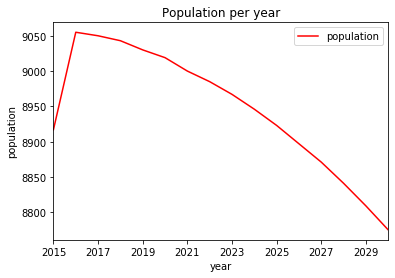

In [9]:
ax = plt.gca()

populationcdmx_2015_2030_sum.plot(kind='line',x='year',y='population', color='red', ax=ax)

plt.ylabel('population')
plt.title('Population per year')

plt.show()

Now, we will <strong>create a dataframe</strong> that we will use to <strong>merge it with the "boroughscdmx" dataframe</strong> and finally <strong>generate a choropleth map</strong>.

In [10]:
populationcdmx = pd.read_csv('poblacioncdmx.csv', encoding='utf-8')
populationcdmx = populationcdmx.drop(['borough_key', 'pp_2016', 'ppth_2016', 'pp_2017', 'ppth_2017',
                                   'pp_2018', 'ppth_2018', 'pp_2020', 'ppth_2020', 'pp_2021', 'ppth_2021', 
                                   'pp_2022', 'ppth_2022', 'pp_2023', 'ppth_2023','pp_2024', 'ppth_2024', 
                                   'pp_2025', 'ppth_2025', 'pp_2026', 'ppth_2026', 'pp_2027', 'ppth_2027', 
                                   'pp_2028', 'ppth_2028', 'pp_2029', 'ppth_2029', 'pp_2030', 'ppth_2030'], axis=1)
populationcdmx.set_index('borough', inplace=True)
populationcdmx.head()

,population2015,population2015_th,population_per1,population_per2,land_area,land_area1,population_per_square_kilometer,population_per_square_kilometer1,pp_2019,ppth_2019
borough,,,,,,,,,,
AZCAPOTZALCO,"400,161",400.0,4.5,4.50%,2.20%,2.2,"11,937",11937.0,"409,860",410.0
COYOACAN,"608,479",608.0,6.8,6.80%,3.60%,3.6,"11,284",11284.0,"623,683",624.0
CUAJIMALPA DE MORELOS,"199,224",199.0,2.2,2.20%,4.80%,4.8,"2,788",2788.0,"199,380",199.0
GUSTAVO A. MADERO,"1,164,477",1164.0,13.1,13.10%,5.90%,5.9,"13,247",13247.0,"1,180,729",1181.0
IZTACALCO,"390,348",390.0,4.4,4.40%,1.50%,1.5,"16,902",16902.0,"394,448",394.0


In [11]:
# Merge both files and reset index.
mergedcdmx = pd.merge(boroughscdmx, populationcdmx, on = 'borough')
mergedcdmx = mergedcdmx.reset_index()
mergedcdmx.head()

,borough,geo_key,borough_key,state_key,geometry,population2015,population2015_th,population_per1,population_per2,land_area,land_area1,population_per_square_kilometer,population_per_square_kilometer1,pp_2019,ppth_2019
0,TLALPAN,09012,012,09,POLYGON ((-99.19628607999992 19.30227816999913...,"677,104",677.0,7.6,7.60%,21.00%,21.0,"2,153",2153.0,"681,728",682.0
1,VENUSTIANO CARRANZA,09017,017,09,POLYGON ((-99.10894588999996 19.45273362999915...,"427,263",427.0,4.8,4.80%,2.30%,2.3,"12,617",12617.0,"434,290",434.0
2,AZCAPOTZALCO,09002,002,09,POLYGON ((-99.18230696999991 19.50747924999914...,"400,161",400.0,4.5,4.50%,2.20%,2.2,"11,937",11937.0,"409,860",410.0
3,IZTAPALAPA,09007,007,09,POLYGON ((-99.05813287699995 19.40071958499914...,"1,827,868",1828.0,20.5,20.50%,7.60%,7.6,"16,152",16152.0,"1,823,468",1823.0
4,IZTACALCO,09006,006,09,POLYGON ((-99.05583625999996 19.42196122999907...,"390,348",390.0,4.4,4.40%,1.50%,1.5,"16,902",16902.0,"394,448",394.0


In [12]:
# Declare a list that is to be converted into a column 
prosperity_index = ['54.3', '53.7', '56.5', '53.2', '54.4', '61.5', '53.4', '57.1', '49.7', '55.7', '56.6', 
'52.2', '52.1', '57.4', '55.2', '54.1'] 

# Using 'prosperity_index' as the column name 
# and equating it to the list 
mergedcdmx['prosperity_index'] = prosperity_index
mergedcdmx.head()

,borough,geo_key,borough_key,state_key,geometry,population2015,population2015_th,population_per1,population_per2,land_area,land_area1,population_per_square_kilometer,population_per_square_kilometer1,pp_2019,ppth_2019,prosperity_index
0,TLALPAN,09012,012,09,POLYGON ((-99.19628607999992 19.30227816999913...,"677,104",677.0,7.6,7.60%,21.00%,21.0,"2,153",2153.0,"681,728",682.0,54.3
1,VENUSTIANO CARRANZA,09017,017,09,POLYGON ((-99.10894588999996 19.45273362999915...,"427,263",427.0,4.8,4.80%,2.30%,2.3,"12,617",12617.0,"434,290",434.0,53.7
2,AZCAPOTZALCO,09002,002,09,POLYGON ((-99.18230696999991 19.50747924999914...,"400,161",400.0,4.5,4.50%,2.20%,2.2,"11,937",11937.0,"409,860",410.0,56.5
3,IZTAPALAPA,09007,007,09,POLYGON ((-99.05813287699995 19.40071958499914...,"1,827,868",1828.0,20.5,20.50%,7.60%,7.6,"16,152",16152.0,"1,823,468",1823.0,53.2
4,IZTACALCO,09006,006,09,POLYGON ((-99.05583625999996 19.42196122999907...,"390,348",390.0,4.4,4.40%,1.50%,1.5,"16,902",16902.0,"394,448",394.0,54.4


We <strong>import the package called JSON</strong> used for encoding and decoding JSON data.

In [13]:
import json

#Read data to json.
merged_json = json.loads(mergedcdmx.to_json())

#Convert to String like object.
json_data = json.dumps(merged_json)

In [14]:
mergedcdmx.describe()

,population2015_th,population_per1,land_area1,population_per_square_kilometer1,ppth_2019
count,16.000000,16.000000,16.000000,16.000000,16.00000
mean,557.312500,6.256250,6.243750,9183.125000,564.37500
std,418.298254,4.697513,5.914611,5748.073438,417.73626
min,138.000000,1.500000,1.500000,463.000000,139.00000
25%,363.500000,4.100000,2.275000,3795.750000,376.00000
50%,416.500000,4.700000,4.500000,9570.000000,424.50000
75%,625.250000,7.000000,6.700000,13843.500000,638.50000
max,1828.000000,20.500000,21.000000,16902.000000,1823.00000


In [15]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer


from bokeh.models import HoverTool


#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlOrRd'][8]

#Reverse color order so that dark red is most populated.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 1600)

#Define custom tick labels for color bar.
tick_labels = {'0': '0', '200': '200 K', '400':'400 K', '600':'600 K', '800':'800 K', '1000':'1 M', '1200':'1.2 M','1400':'1.4 M', '1600':'>1.6 M'}

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 20, height = 500,
border_line_color=None,location = (0,0), orientation = 'vertical', major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Population in Mexico City (CDMX), 2015', plot_height = 550 , plot_width = 500, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'population2015_th', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)



hover = HoverTool()
hover.tooltips = [('Borough', '@borough'), ('Prosperity Index', '@prosperity_index'), ('Population', '@population2015'), ('Population projection 2019', '@pp_2019'),
                 ('% land area', '@land_area')]

p.add_tools(hover)



#Specify figure layout.
p.add_layout(color_bar, 'right')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)

Loading BokehJS ...

Let´s <strong>import "empresascdmx.csv" file and create a dataframe called "companiescdmx"</strong>. This file contains relevant information about existent enterprises inside of Mexico City. Subsequently, let's <strong>filter only the companies dedicated to physical conditioning</strong>.

In [16]:
companiescdmx = pd.read_csv('empresascdmx.csv', dtype={'postal_code' : object}, encoding='utf-8')

# Work with only activity names rows that contain the word ACONDICIONAMIENTO FISICO
gymcdmx = companiescdmx[companiescdmx['activity_name'].str.contains('ACONDICIONAMIENTO FISICO')].reset_index(drop=True)

gymcdmx.head()

,id,property_name,borough,postal_code,latitude,longitude,activity_name,per_ocu
0,689998,NOMBRE,MIGUEL HIDALGO,11550,19.432421,-99.197516,CENTROS DE ACONDICIONAMIENTO FISICO DEL SECTOR...,11 A 30 PERSONAS
1,752673,4LMENTS,GUSTAVO A MADERO,7080,19.497102,-99.099472,CENTROS DE ACONDICIONAMIENTO FISICO DEL SECTOR...,6 A 10 PERSONAS
2,867230,4U GYM,CUAUHTEMOC,6170,19.411054,-99.181762,CENTROS DE ACONDICIONAMIENTO FISICO DEL SECTOR...,6 A 10 PERSONAS
3,6785444,8W BARRANCA DEL MUERTO,BENITO JUAREZ,3910,19.363018,-99.182585,CENTROS DE ACONDICIONAMIENTO FISICO DEL SECTOR...,6 A 10 PERSONAS
4,6734479,8W CONDESA,CUAUHTEMOC,6100,19.405872,-99.170853,CENTROS DE ACONDICIONAMIENTO FISICO DEL SECTOR...,6 A 10 PERSONAS


Let's see <strong>how many gyms are there in Mexico City</strong>.

In [17]:
gymcdmx.activity_name.value_counts()

CENTROS DE ACONDICIONAMIENTO FISICO DEL SECTOR PRIVADO    1950
CENTROS DE ACONDICIONAMIENTO FISICO DEL SECTOR PUBLICO     175
Name: activity_name, dtype: int64

There are 1950 private sector gyms and 175 public sector gyms. Now, let´s see <strong>how many gyms are there by borough</strong>.

In [18]:
gymbyborough = gymcdmx['borough'].value_counts()
gymbyborough

IZTAPALAPA                380
GUSTAVO A MADERO          283
TLALPAN                   164
CUAUHTEMOC                153
COYOACAN                  152
TLAHUAC                   130
XOCHIMILCO                127
BENITO JUAREZ             116
ALVARO OBREGON            110
MIGUEL HIDALGO            104
VENUSTIANO CARRANZA       101
IZTACALCO                  84
AZCAPOTZALCO               71
LA MAGDALENA CONTRERAS     58
CUAJIMALPA DE MORELOS      49
MILPA ALTA                 43
Name: borough, dtype: int64

Now, it´s time to <strong>map a sample of existing gyms</strong> inside of Mexico City (1,800 gyms). This will be done using clusters for better viewing and each cluster is then represented by the number of gyms in that area.

In [19]:
# Mexico City latitude and longitude values
latitude = 19.3884706
longitude = -99.1276627

In [20]:
# get the first 1800 gyms in the gymcmdx dataframe
limit = 1800
gymcdmx_sample = gymcdmx.iloc[0:limit, :]

In [21]:
from folium import plugins

# Create map and display it
cdmx_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

# instantiate a mark cluster object for the gyms in the dataframe
gym = plugins.MarkerCluster().add_to(cdmx_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(gymcdmx_sample.latitude, gymcdmx_sample.longitude, gymcdmx_sample.property_name):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(gym)

# display map
cdmx_map

For the purposes of <strong>using K-means and segmenting boroughs according to their behavior patterns</strong>, we will only use some columns of "mergedcdmx", not omitting that to refine the results more variables could be used.

In [22]:
boroughsmatrix = mergedcdmx[['population2015_th', 'population_per1', 'population_per_square_kilometer1', 
                              'land_area1', 'prosperity_index']].copy()
boroughsmatrix.head()

,population2015_th,population_per1,population_per_square_kilometer1,land_area1,prosperity_index
0,677.0,7.6,2153.0,21.0,54.3
1,427.0,4.8,12617.0,2.3,53.7
2,400.0,4.5,11937.0,2.2,56.5
3,1828.0,20.5,16152.0,7.6,53.2
4,390.0,4.4,16902.0,1.5,54.4


In [23]:
boroughsmatrix.dtypes

population2015_th                   float64
population_per1                     float64
population_per_square_kilometer1    float64
land_area1                          float64
prosperity_index                     object
dtype: object

In [24]:
boroughsmatrix['prosperity_index']=boroughsmatrix['prosperity_index'].astype('float')

Now, let's <strong>normalize the dataset</strong> using StandardScaler to help mathematical-based algorithms interpret features with different magnitudes and distributions equally.

In [25]:
from sklearn.preprocessing import StandardScaler

X = boroughsmatrix.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 0.295437  , -1.26315051,  2.57670185, -0.19719526],
       [-0.32017126,  0.61698774, -0.6886484 , -0.42527654],
       [-0.38612929,  0.4948075 , -0.70611016,  0.63910273],
       [ 3.13163218,  1.2521453 ,  0.2368252 , -0.61534426],
       [-0.40811529,  1.38690292, -0.82834253, -0.15918172],
       [-0.47407332, -0.2384536 , -0.54895427,  2.53977998],
       [-0.78187745, -0.95895765, -0.35687484, -0.53931717],
       [ 0.11954892,  0.37747854, -0.46164544,  0.867184  ],
       [-1.04570956, -1.56680433,  2.40208419, -1.94581834],
       [-0.05633915,  1.29203356, -0.70611016,  0.33499437],
       [ 0.47132507, -0.24474229,  0.02728401,  0.67711627],
       [-0.34215727, -0.99507269,  0.2368252 , -0.99547971],
       [-0.47407332, -0.89319593, -0.09494835, -1.03349326],
       [-0.34215727,  1.15889303, -0.77595723,  0.98122463],
       [-0.8918075 , -1.14905573, -0.25210425,  0.14492664],
       [ 1.5046675 ,  0.73018414, -0.06002482, -0.27322235]])

In [26]:
np.random.seed(0)

After normalization, let´s <strong>run the model and group the boroughs into three clusters</strong>.

In [27]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

[0 1 1 2 1 1 0 1 0 1 1 0 0 1 0 2]


Each row in the dataset represent a borough and <strong>a label will be assigned to each one of them</strong>.

In [28]:
boroughsmatrix["Labels"] = labels
boroughsmatrix

,population2015_th,population_per1,population_per_square_kilometer1,land_area1,prosperity_index,Labels
0,677.0,7.6,2153.0,21.0,54.3,0
1,427.0,4.8,12617.0,2.3,53.7,1
2,400.0,4.5,11937.0,2.2,56.5,1
3,1828.0,20.5,16152.0,7.6,53.2,2
4,390.0,4.4,16902.0,1.5,54.4,1
5,364.0,4.1,7856.0,3.1,61.5,1
6,244.0,2.7,3846.0,4.2,53.4,0
7,608.0,6.8,11284.0,3.6,57.1,1
8,138.0,1.5,463.0,20.0,49.7,0
9,533.0,6.0,16374.0,2.2,55.7,1


We will get the <strong>centroid value</strong> by averaging the features in each cluster.

In [29]:
boroughsmatrix.groupby('Labels').mean()

,population2015_th,population_per1,population_per_square_kilometer1,land_area1,prosperity_index
Labels,,,,,
0,339.333333,3.8000,2851.166667,10.5500,52.816667
1,486.125000,5.4625,12553.000000,2.8875,56.612500
2,1496.000000,16.8000,14699.500000,6.7500,53.650000


Considering the common characteristics of each cluster, let´s create a profile for each of them.

<h3>Label 0</h3>
<p style="color:blue;">Population: <strong>Low</strong></p>
<p style="color:blue;">Percentage of population: <strong>Low</strong></p>
<p style="color:blue;">Population per square kilometer: <strong>Low</strong></p>
<p style="color:red;">Large area of land: <strong>High</strong></p>
<p style="color:blue;">Prosperity Index: <strong>Low</strong></p>

<h3>Label 1</h3>
<p style="color:orange;">Population: <strong>Middle</strong></p>
<p style="color:orange;">Percentage of population: <strong>Middle</strong></p>
<p style="color:orange;">Population per square kilometer: <strong>Middle</strong></p>
<p style="color:blue;">Large area of land: <strong>Low</strong></p>
<p style="color:red;">Prosperity Index: <strong>High</strong></p>

<h3>Label 2</h3>
<p style="color:red;">Population: <strong>High</strong></p>
<p style="color:red;">Percentage of population: <strong>High</strong></p>
<p style="color:red;">Population per square kilometer: <strong>High</strong></p>
<p style="color:orange;">Large area of land: <strong>Middle</strong></p>
<p style="color:orange;">Prosperity Index: <strong>Middle</strong></p>

<strong>WE CHOOSE THE "LABEL 1" GROUP MAINLY BECAUSE IT HAS THE HIGHEST PROSPERITY INDEX AND ITS POPULATION FEATURES ARE ACCEPTABLE TO DEVELOP THE PROJECT.</strong>

<strong>WITHIN "LABEL 1", WE IDENTIFY MIGUEL HIDALGO AS THE BOROUGH WITH THE HIGHEST PROSPERITY INDEX AND IT IS THE SEVENTH BOROUGH WITH THE LEAST AMOUNT OF EXISTING GYMS.</strong>

<strong>LET´S EXPLORE MIGUEL HIDALGO!</strong>

Read "coloniascdmx.csv" file and <strong>create a dataframe that contain neighborhoods information</strong> of Miguel Hidalgo borough.

In [30]:
neighborhoodscdmx = pd.read_csv('coloniascdmx.csv', encoding='utf-8')
neighborhoodscdmx.head()

,BOROUGH,NEIGHBORHOOD,LATITUDE,LONGITUDE
0,MIGUEL HIDALGO,LOMAS DE REFORMA,19.40168155,-99.23547196
1,MIGUEL HIDALGO,DANIEL GARZA (AMPL),19.40921847,-99.19383925
2,MIGUEL HIDALGO,IGNACIO MANUEL ALTAMIRANO,19.46314405,-99.196828
3,MIGUEL HIDALGO,LEGARIA,19.45553055,-99.19304827
4,MIGUEL HIDALGO,LEGARIA (U HAB),19.45002004,-99.20107608


In [31]:
# Borough column filter
neighborhoods_mh = neighborhoodscdmx[neighborhoodscdmx['BOROUGH'] == 'MIGUEL HIDALGO'].reset_index(drop=True)
neighborhoods_mh.head()

,BOROUGH,NEIGHBORHOOD,LATITUDE,LONGITUDE
0,MIGUEL HIDALGO,LOMAS DE REFORMA,19.40168155,-99.23547196
1,MIGUEL HIDALGO,DANIEL GARZA (AMPL),19.40921847,-99.19383925
2,MIGUEL HIDALGO,IGNACIO MANUEL ALTAMIRANO,19.46314405,-99.196828
3,MIGUEL HIDALGO,LEGARIA,19.45553055,-99.19304827
4,MIGUEL HIDALGO,LEGARIA (U HAB),19.45002004,-99.20107608


In [32]:
neighborhoods_mh.shape

(88, 4)

There are <strong>88 neighborhoods</strong> in the Miguel Hidalgo borough.

In [33]:
neighborhoods_mh.dtypes

BOROUGH         object
NEIGHBORHOOD    object
LATITUDE        object
LONGITUDE       object
dtype: object

In [34]:
# Converting "LATITUDE" and "LONGITUDE" columns type to float.
neighborhoods_mh['LATITUDE']=neighborhoods_mh['LATITUDE'].astype('float')
neighborhoods_mh['LONGITUDE']=neighborhoods_mh['LONGITUDE'].astype('float')

In [35]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: ...working... 
  - anaconda::ca-certificates-2019.5.15-0, anaconda::certifi-2019.6.16-py37_0, anaconda::openssl-1.1.1c-he774522_1
  - anaconda::ca-certificates-2019.5.15-0, anaconda::openssl-1.1.1c-he774522_1, defaults::certifi-2019.6.16-py37_0
  - anaconda::certifi-2019.6.16-py37_0, anaconda::openssl-1.1.1c-he774522_1, defaults::ca-certificates-2019.5.15-0
  - anaconda::openssl-1.1.1c-he774522_1, defaults::ca-certificates-2019.5.15-0, defaults::certifi-2019.6.16-py37_0
  - anaconda::certifi-2019.6.16-py37_0, defaults::ca-certificates-2019.5.15-0, defaults::openssl-1.1.1c-he774522_1
  - defaults::ca-certificates-2019.5.15-0, defaults::certifi-2019.6.16-py37_0, defaults::openssl-1.1.1c-he774522_1
  - anaconda::ca-certificates-2019.5.15-0, anaconda::certifi-2019.6.16-py37_0, defaults::openssl-1.1.1c-he774522_1
  - anaconda::ca-certificates-2019.5.15-0, defaults::certifi-2019.6.16-py37_0, defaults::openssl-1.1.1c-he774522_1done

# All requested packages already instal

Geopy library will be used to get the latitude and longitude values of Miguel Hidalgo.

In [36]:
address = 'Miguel Hidalgo, Ciudad de México'

geolocator = Nominatim(user_agent="Miguel_Hidalgo")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Miguel Hidalgo borough are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Miguel Hidalgo borough are 19.42966465, -99.1986750379349.


In [37]:
# create map of Miguel Hidalgo borough using latitude and longitude values
map_mh = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_mh['LATITUDE'], neighborhoods_mh['LONGITUDE'], 
                                           neighborhoods_mh['BOROUGH'], neighborhoods_mh['NEIGHBORHOOD']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh)  
    
map_mh

<strong>Define Foursquare Credentials and Version</strong>

In [38]:
# @hidden_cell
CLIENT_ID = '4CJMUA53TYSEN5HNMMC3VEKH0DLXEYUEEHJES5TZ4EIYWQFZ' # your Foursquare ID
CLIENT_SECRET = '4NDB43IDKSBE5HA0TD2EIV1YFS5EUNKPNCMQGJLKON0RPFJ0' # your Foursquare Secret
VERSION = '20190928' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4CJMUA53TYSEN5HNMMC3VEKH0DLXEYUEEHJES5TZ4EIYWQFZ
CLIENT_SECRET:4NDB43IDKSBE5HA0TD2EIV1YFS5EUNKPNCMQGJLKON0RPFJ0


## Results and Discussion <a name="results"></a>

## Conclusion <a name="conclusion"></a>

## References <a name="references"></a>

### 1 <a name="1" href="https://onuhabitat.org.mx/index.php/indice-de-las-ciudades-prosperas-cpi-mexico-2018">Índice de las Ciudades Prósperas, CPI, México 2018 - ONU</a>

### 2 <a name="2" href="https://datos.cdmx.gob.mx/explore/dataset/alcaldias/table/">Alcaldías - Gobierno de la Ciudad de México</a>

### 3 <a name="3" href="https://datos.cdmx.gob.mx/explore/dataset/coloniascdmx/table/">Colonias - Gobierno de la Ciudad de México</a>

### 4 <a name="4" href="https://www.inegi.org.mx/app/biblioteca/ficha.html?upc=702825082178">Panorama sociodemográfico de Ciudad de México 2015 - INEGI</a>

### 5 <a name="5" href="https://datos.gob.mx/busca/dataset/proyecciones-de-la-poblacion-de-mexico-y-de-las-entidades-federativas-2016-2050/resource/efd9c27a-c8f5-4980-ab4d-e29c6e7638c8">Proyecciones de la Población de los Municipios de México, 2015-2030 (base 1) - CONAPO</a>

### 6 <a name="6" href="https://www.inegi.org.mx/app/descarga/?ti=6#saladeprensa">Directorio Estadístico Nacional de Unidades Económicas CDMX 2019/04 - INEGI</a>

### 7 <a name="7" href="https://developer.foursquare.com/">Foursquare API</a>

[Return](#data)